In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Loading 'Property Prices in Tunisia.csv'

In [2]:
df = pd.read_csv('/content/Property Prices in Tunisia.csv')
display(df.head())

,category,room_count,bathroom_count,size,type,price,city,region,log_price
0,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,100000.0,Ariana,Raoued,5.000000
1,Terrains et Fermes,-1.0,-1.0,-1.0,À Vendre,316000.0,Ariana,Autres villes,5.499687
2,Appartements,2.0,1.0,80.0,À Louer,380.0,Ariana,Autres villes,2.579784
3,Locations de vacances,1.0,1.0,90.0,À Louer,70.0,Ariana,Autres villes,1.845098
4,Appartements,2.0,2.0,113.0,À Vendre,170000.0,Ariana,Ariana Ville,5.230449


In [3]:
grand_tunis_regions = ['Tunis', 'Ariana', 'Ben arous', 'La manouba']
df = df[df['category'] == 'Appartements']
df = df[df['type'] == 'À Vendre']
df = df[df['city'].isin(grand_tunis_regions)]
df['price'] = df['price']/1000
df = df.drop(columns=['category', 'type', 'log_price'])

df = df[df['price'] <= 3000]
df = df[~((df['price'] <= 70)  & (df['size'] >= 70))]
df = df[~((df['price'] >= 1000)  & (df['size'] <= 90))]
df = df[~((df['room_count'] >= 2)  & (df['size'] <= 25))]

In [4]:
display(df.head())

,room_count,bathroom_count,size,price,city,region
4,2.0,2.0,113.0,170.0,Ariana,Ariana Ville
13,3.0,2.0,138.0,340.0,Ariana,Jardins D'el Menzah
18,2.0,1.0,80.0,230.0,Ariana,Ennasr
21,4.0,2.0,200.0,440.0,Ariana,Ennasr
24,4.0,1.0,160.0,310.0,Ariana,Autres villes


### Checking for Duplicate Rows

In [5]:
# Check for exact duplicate rows
exact_duplicates = df[df.duplicated(keep=False)]

print(f"Number of exact duplicate rows: {len(exact_duplicates)}")

if not exact_duplicates.empty:
    print("Exact duplicate rows:")
    display(exact_duplicates.sort_values(by=list(df.columns)))
else:
    print("No exact duplicate rows found.")

Number of exact duplicate rows: 118
Exact duplicate rows:


,room_count,bathroom_count,size,price,city,region
4588,1.0,1.0,50.0,58.0,La manouba,Denden
5016,1.0,1.0,50.0,58.0,La manouba,Denden
2283,1.0,1.0,50.0,150.0,Ariana,Ennasr
2307,1.0,1.0,50.0,150.0,Ariana,Ennasr
413,1.0,1.0,58.0,109.0,Ariana,Chotrana
...,...,...,...,...,...,...
3326,4.0,2.0,110.0,130.0,Ben arous,El Mourouj
366,4.0,3.0,174.0,500.0,Ariana,La Soukra
1505,4.0,3.0,174.0,500.0,Ariana,La Soukra
136,4.0,3.0,370.0,1100.0,Ariana,La Soukra


### Removing Exact Duplicate Rows

In [6]:
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_after_deduplication = len(df)
print(f"Number of rows before removing exact duplicates: {initial_rows}")
print(f"Number of rows after removing exact duplicates: {rows_after_deduplication}")
print(f"Number of exact duplicates removed: {initial_rows - rows_after_deduplication}")

Number of rows before removing exact duplicates: 1034
Number of rows after removing exact duplicates: 969
Number of exact duplicates removed: 65


#### Checking for Partial Duplicates (based on identifying features)

We'll check for duplicates considering all features except `price`, as a property might be listed multiple times with slight price variations, or we might want to identify properties with identical characteristics.

In [7]:
# Define columns to consider for partial duplicates (excluding 'price')
columns_for_partial_check = ['room_count', 'bathroom_count', 'size', 'city', 'region']

partial_duplicates = df[df.duplicated(subset=columns_for_partial_check, keep=False)]

print(f"Number of partial duplicate rows (based on {', '.join(columns_for_partial_check)}): {len(partial_duplicates)}")

if not partial_duplicates.empty:
    print("Partial duplicate rows:")
    display(partial_duplicates.sort_values(by=columns_for_partial_check))
else:
    print("No partial duplicate rows found based on the selected criteria.")

Number of partial duplicate rows (based on room_count, bathroom_count, size, city, region): 147
Partial duplicate rows:


,room_count,bathroom_count,size,price,city,region
173,1.0,1.0,60.0,180.00,Ariana,Ennasr
516,1.0,1.0,60.0,155.00,Ariana,Ennasr
575,1.0,1.0,60.0,100.00,Ariana,La Soukra
1977,1.0,1.0,60.0,120.00,Ariana,La Soukra
11397,1.0,1.0,60.0,195.00,Tunis,Autres villes
...,...,...,...,...,...,...
2219,4.0,1.0,147.0,257.75,Ariana,Jardins D'el Menzah
11690,4.0,2.0,160.0,400.00,Tunis,Menzah
12638,4.0,2.0,160.0,180.00,Tunis,Menzah
21,4.0,2.0,200.0,440.00,Ariana,Ennasr


##Price per Square Meter Analysis

In [ ]:
df['price_per_sqm'] = (df['price'] * 1000) / df['size']
df = df[df['price_per_sqm'] <= 6000 ]

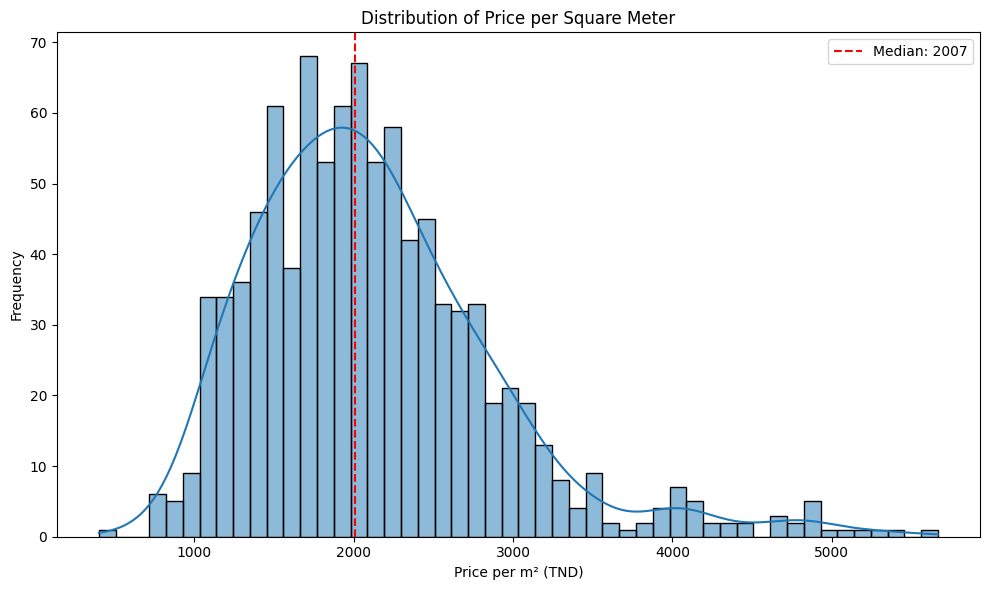

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqm'], bins=50, kde=True)
plt.title('Distribution of Price per Square Meter')
plt.xlabel('Price per m² (TND)')
plt.ylabel('Frequency')
plt.axvline(df['price_per_sqm'].median(), color='red', linestyle='--', label=f"Median: {df['price_per_sqm'].median():.0f}")
plt.legend()
plt.tight_layout()
plt.show()


In [58]:
df = df.drop(columns=['price_per_sqm'])

### Data Types of Features

In [38]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 4 to 12741
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   room_count      951 non-null    float64
 1   bathroom_count  951 non-null    float64
 2   size            951 non-null    float64
 3   price           951 non-null    float64
 4   city            951 non-null    object 
 5   region          951 non-null    object 
 6   price_per_sqm   951 non-null    float64
dtypes: float64(5), object(2)
memory usage: 59.4+ KB


None

### Understanding Each Feature

Based on your dataset's columns and common property features, here's what each feature represents:

- **`room_count`**: A numerical feature representing the number of rooms in the property.
- **`bathroom_count`**: A numerical feature representing the number of bathrooms in the property.
- **`size`**: A numerical feature representing the size of the property, likely in square meters.
- **`price`**: A numerical feature representing the sale price of the property in kTND.
- **`city`**: A categorical feature indicating the city where the property is located.
- **`region`**: A categorical feature providing a more specific geographical region or neighborhood within the city.


### Distribution of `size`

Descriptive statistics for 'size' column:


,size
count,951.000000
mean,122.143007
std,53.893428
min,30.000000
25%,86.000000
50%,112.000000
75%,144.000000
max,500.000000


/tmp/ipython-input-3449938632.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['size'], bins=30, kde=True, palette='viridis')


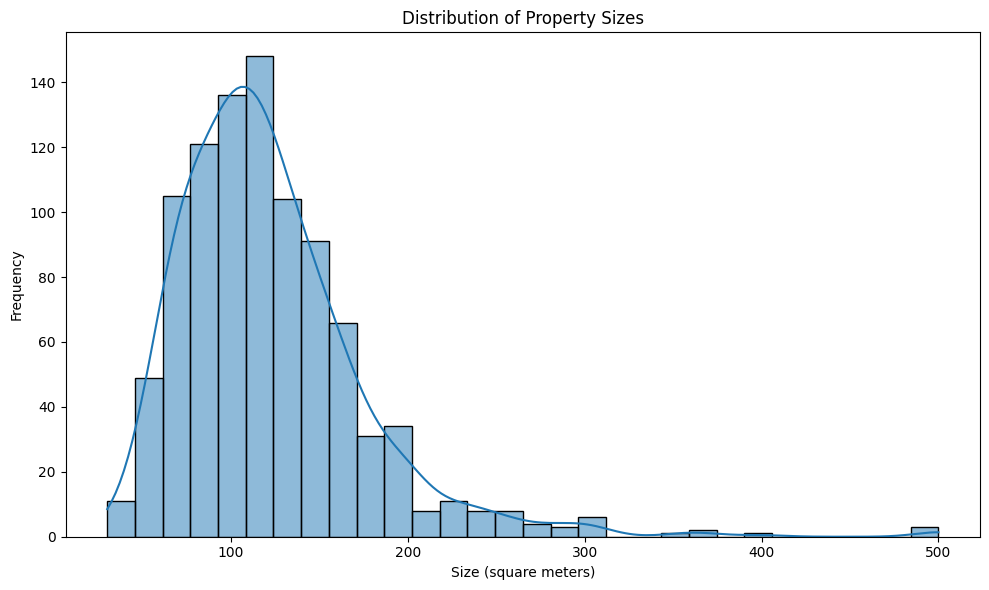

In [39]:
print("Descriptive statistics for 'size' column:")
display(df['size'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(df['size'], bins=30, kde=True, palette='viridis')
plt.title('Distribution of Property Sizes')
plt.xlabel('Size (square meters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Distribution of `room_count`

/tmp/ipython-input-4081212322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='room_count', palette='viridis')


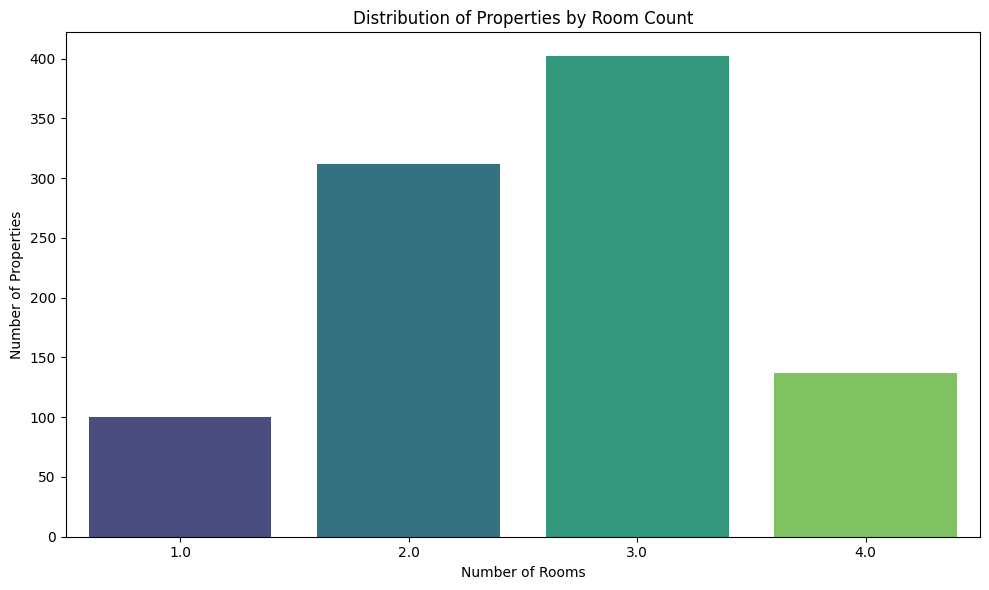

In [40]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='room_count', palette='viridis')
plt.title('Distribution of Properties by Room Count')
plt.xlabel('Number of Rooms')
plt.ylabel('Number of Properties')
plt.tight_layout()
plt.show()

### Distribution of `bathroom_count`

Descriptive statistics for 'bathroom_count' column:


,bathroom_count
count,951.000000
mean,1.413249
std,0.617800
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


/tmp/ipython-input-2142359530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='bathroom_count', palette='viridis')


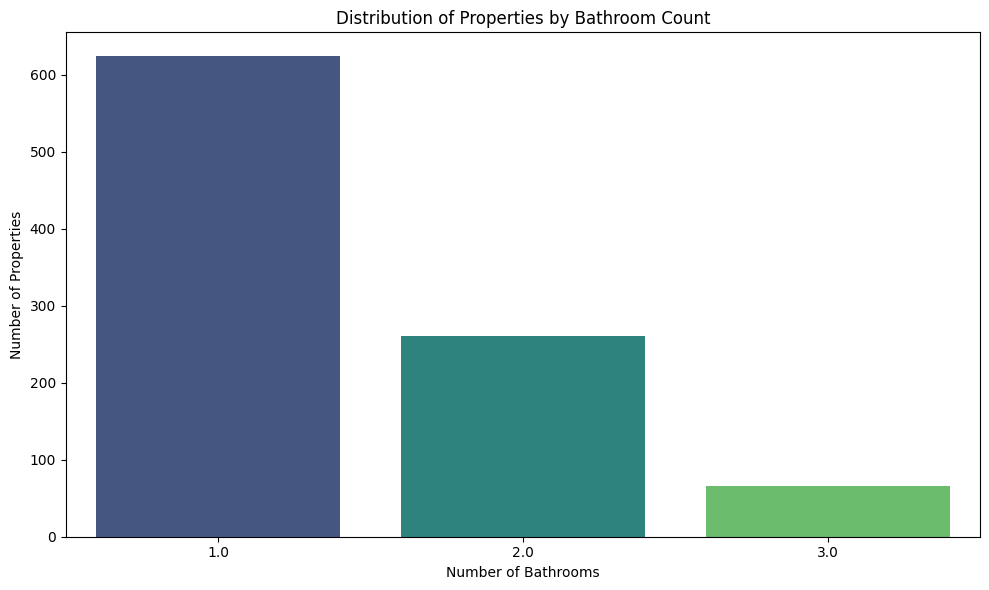

In [41]:
print("Descriptive statistics for 'bathroom_count' column:")
display(df['bathroom_count'].describe())

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bathroom_count', palette='viridis')
plt.title('Distribution of Properties by Bathroom Count')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Properties')
plt.tight_layout()
plt.show()

### Distribution of Properties by City

/tmp/ipython-input-3211994085.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='city', order=df['city'].value_counts().index, palette='viridis')


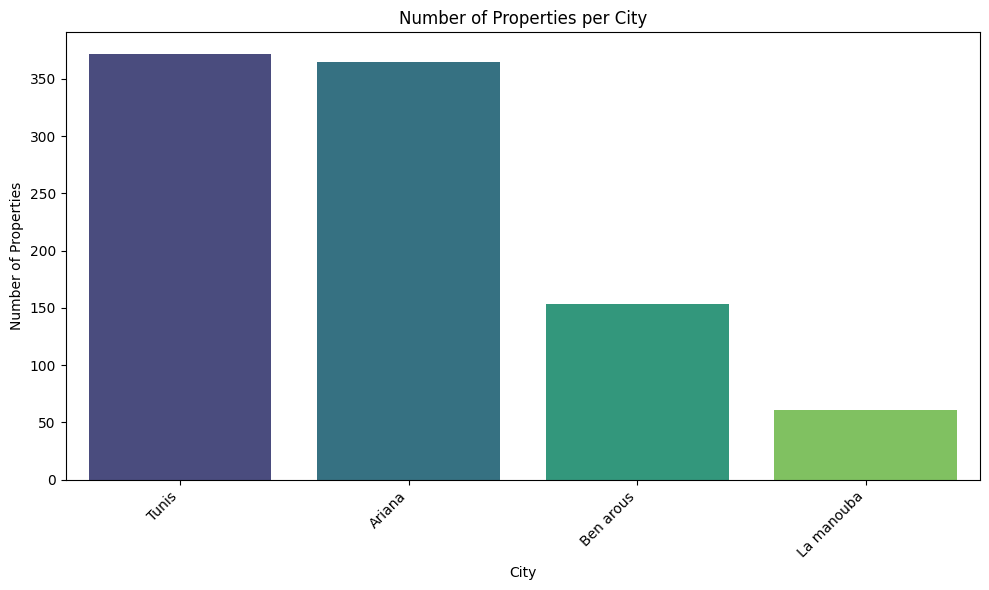

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='city', order=df['city'].value_counts().index, palette='viridis')
plt.title('Number of Properties per City')
plt.xlabel('City')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Distribution of Properties by Region

/tmp/ipython-input-4106973811.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='region', order=df['region'].value_counts().index, palette='viridis')


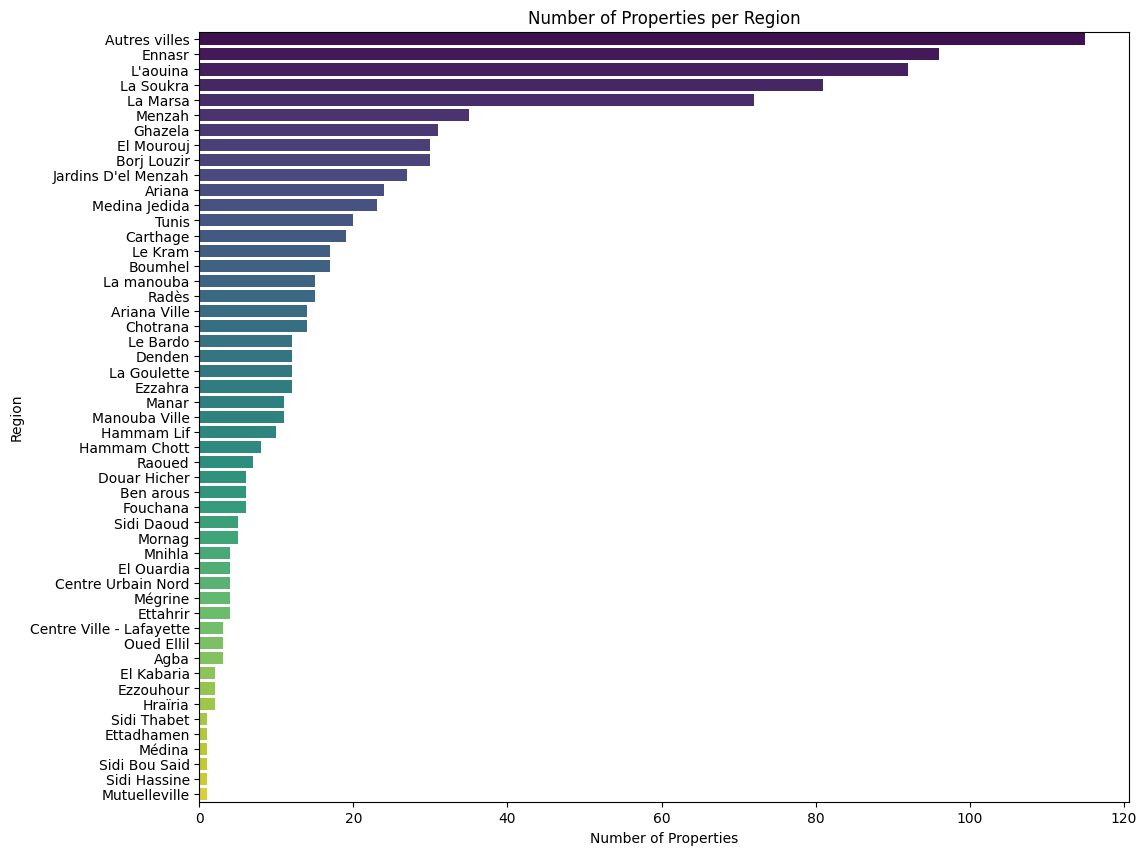

In [43]:
plt.figure(figsize=(12, 10)) # Increased figure height for better spacing
sns.countplot(data=df, y='region', order=df['region'].value_counts().index, palette='viridis')
plt.title('Number of Properties per Region')
plt.xlabel('Number of Properties')
plt.ylabel('Region')
plt.show()

### Overall Price Distribution

In [44]:
print("Descriptive statistics for 'price' column:")
display(df['price'].describe())

Descriptive statistics for 'price' column:


,price
count,951.000000
mean,265.079346
std,173.887992
min,42.000000
25%,154.500000
50%,220.000000
75%,330.000000
max,1500.000000


/tmp/ipython-input-2635674932.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=np.log1p(df['price']), palette='viridis')


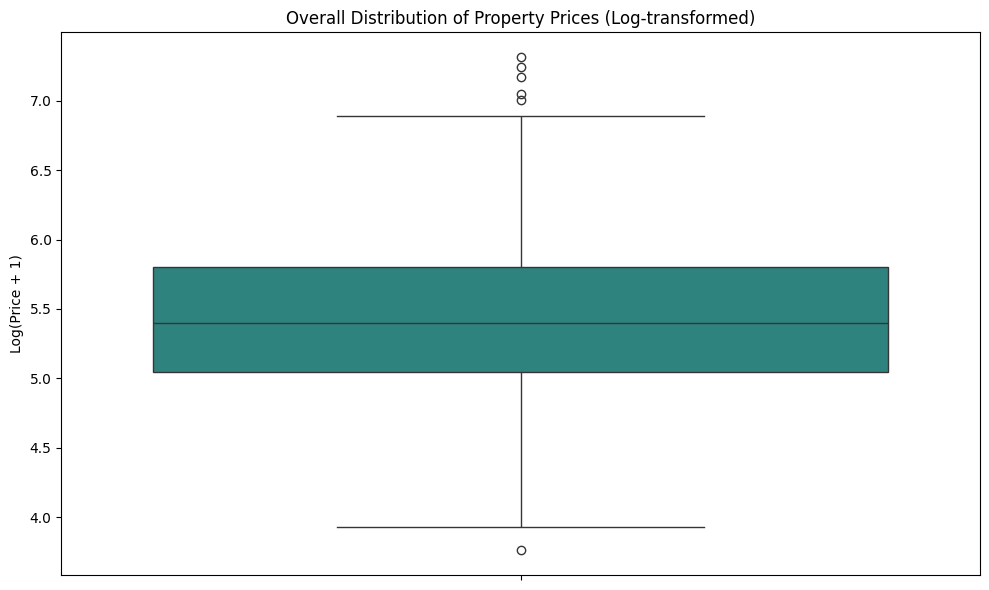

In [45]:

plt.figure(figsize=(10, 6))
sns.boxplot(y=np.log1p(df['price']), palette='viridis')
plt.title('Overall Distribution of Property Prices (Log-transformed)')
plt.ylabel('Log(Price + 1)')
plt.tight_layout()
plt.show()

### Price Distribution by Region

/tmp/ipython-input-3311275367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=np.log1p(df['price']), y='region', data=df.sort_values('price', ascending=False), palette='plasma')


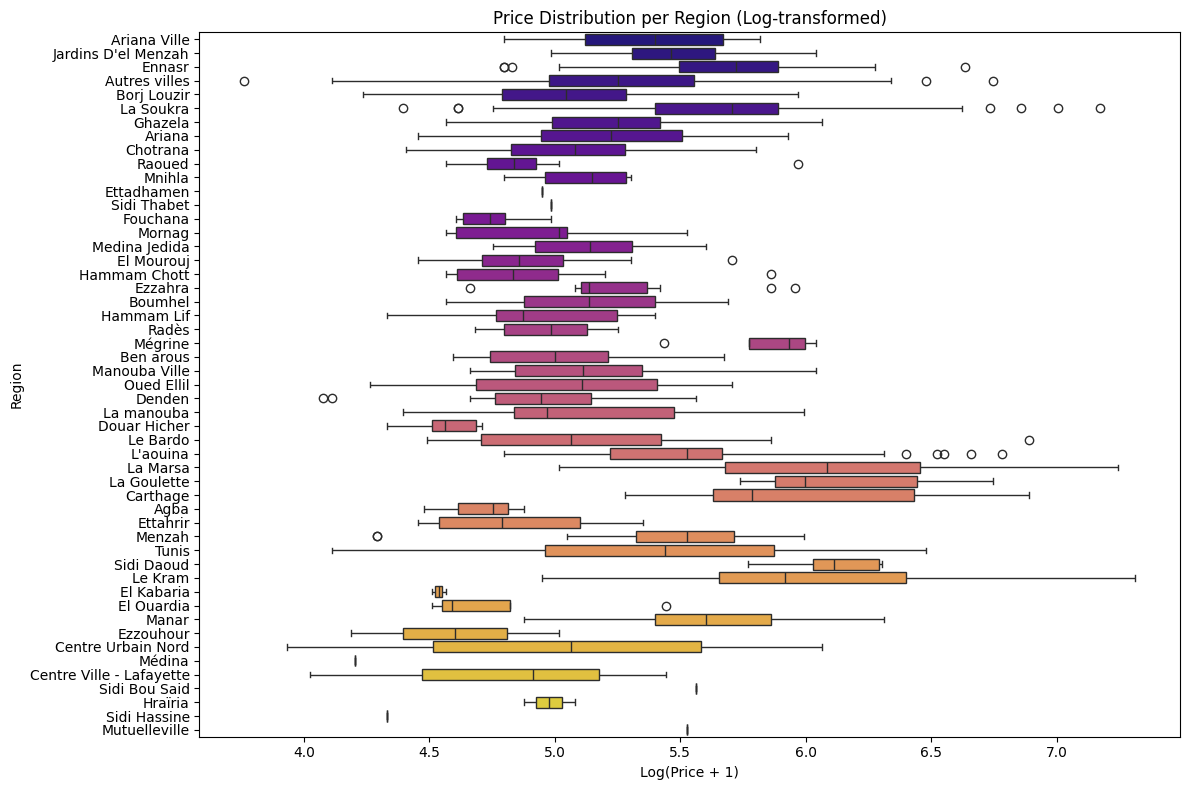

In [46]:

plt.figure(figsize=(12, 8))
sns.boxplot(x=np.log1p(df['price']), y='region', data=df.sort_values('price', ascending=False), palette='plasma')
plt.title('Price Distribution per Region (Log-transformed)')
plt.xlabel('Log(Price + 1)')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

### Price Distribution by City

/tmp/ipython-input-1547348463.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=np.log1p(df['price']), y='city', data=df.sort_values('price', ascending=False), palette='mako')


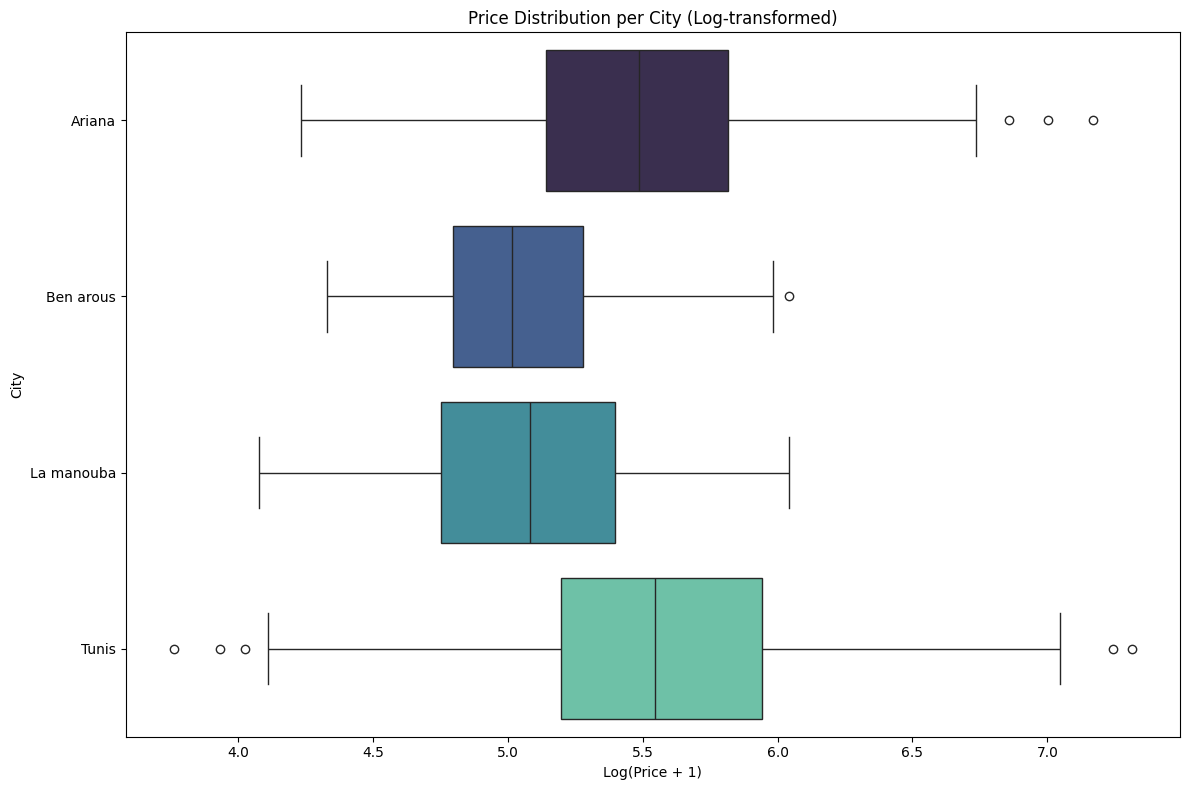

In [47]:

plt.figure(figsize=(12, 8))
sns.boxplot(x=np.log1p(df['price']), y='city', data=df.sort_values('price', ascending=False), palette='mako')
plt.title('Price Distribution per City (Log-transformed)')
plt.xlabel('Log(Price + 1)')
plt.ylabel('City')
plt.tight_layout()
plt.show()

### Price Distribution by Bathroom Count

/tmp/ipython-input-3566178068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bathroom_count', y=np.log1p(df['price']), data=df, palette='cubehelix')


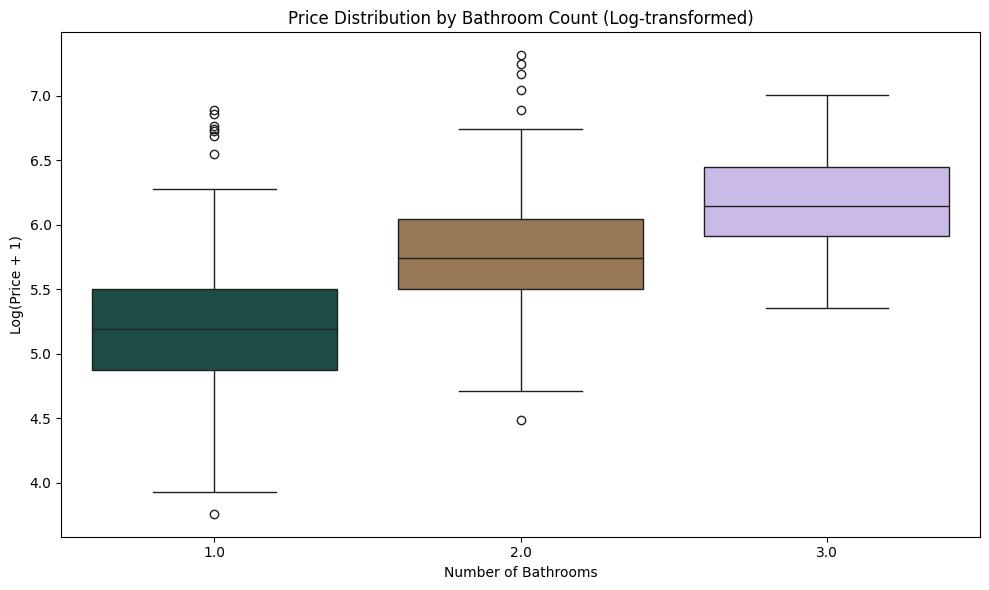

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bathroom_count', y=np.log1p(df['price']), data=df, palette='cubehelix')
plt.title('Price Distribution by Bathroom Count (Log-transformed)')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Log(Price + 1)')
plt.tight_layout()
plt.show()

### Price Distribution by Room Count

/tmp/ipython-input-783056595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='room_count', y=np.log1p(df['price']), data=df, palette='magma')


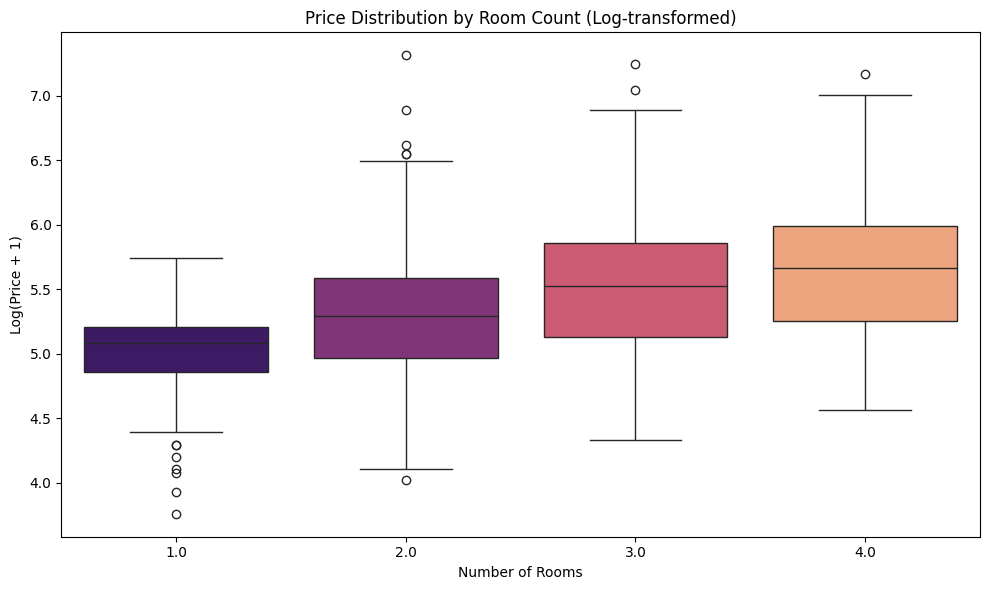

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='room_count', y=np.log1p(df['price']), data=df, palette='magma')
plt.title('Price Distribution by Room Count (Log-transformed)')
plt.xlabel('Number of Rooms')
plt.ylabel('Log(Price + 1)')
plt.tight_layout()
plt.show()

### Price Range by Room Count (Real Numbers)

In [50]:
print("Descriptive statistics of price by room count (in kTND):")
display(df.groupby('room_count')['price'].describe())

Descriptive statistics of price by room count (in kTND):


,count,mean,std,min,25%,50%,75%,max
room_count,,,,,,,,
1.0,100.0,162.304590,56.278736,42.0,128.000,160.0,182.50,310.0
2.0,312.0,224.837679,139.659401,55.0,142.875,197.5,265.75,1500.0
3.0,402.0,296.937704,185.897871,75.0,167.625,250.0,350.00,1400.0
4.0,137.0,338.260482,206.238192,95.0,190.000,288.0,400.00,1300.0


### Price Distribution by Size

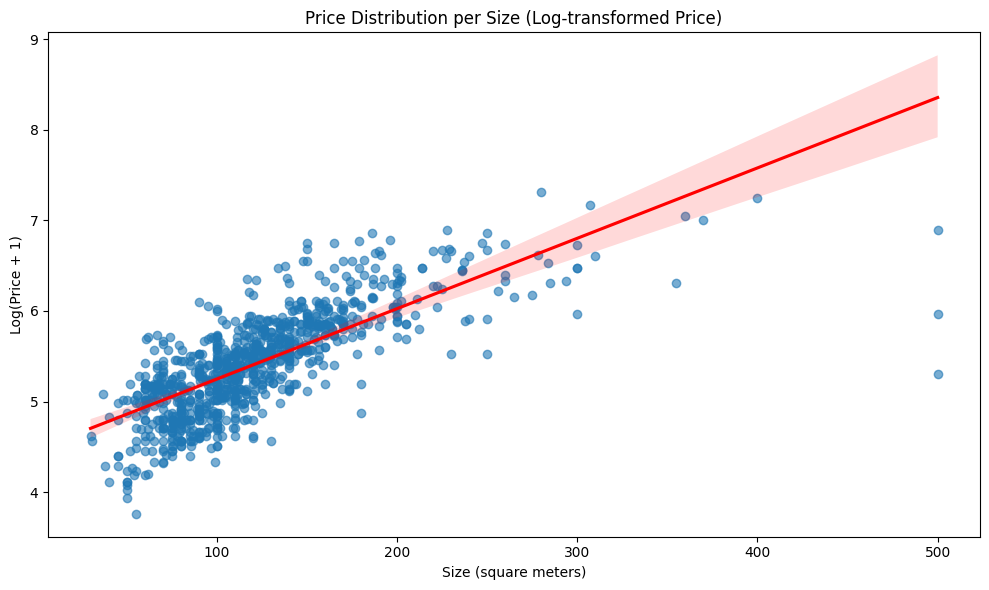

In [51]:
plt.figure(figsize=(10, 6))
sns.regplot(x='size', y=np.log1p(df['price']), data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Price Distribution per Size (Log-transformed Price)')
plt.xlabel('Size (square meters)')
plt.ylabel('Log(Price + 1)')
plt.tight_layout()
plt.show()

### Details of Apartments Below 80 kTND (80,000 TND)

In [52]:
num_apartments_below_80k = len(df[df['price'] < 80.0])
print(f"Number of apartments with price below 80,000 TND: {num_apartments_below_80k}")

Number of apartments with price below 80,000 TND: 19


In [53]:
apartments_below_80k_df = df[df['price'] < 80.0]
display(apartments_below_80k_df)

,room_count,bathroom_count,size,price,city,region,price_per_sqm
764,2.0,1.0,50.0,68.0,Ariana,Borj Louzir,1360.000000
2595,2.0,1.0,65.0,75.0,Ben arous,Hammam Lif,1153.846154
4588,1.0,1.0,50.0,58.0,La manouba,Denden,1160.000000
4846,3.0,1.0,99.0,75.0,La manouba,Douar Hicher,757.575758
4932,2.0,1.0,53.0,70.0,La manouba,Oued Ellil,1320.754717
4948,2.0,1.0,50.0,60.0,La manouba,Denden,1200.000000
10410,1.0,1.0,55.0,42.0,Tunis,Autres villes,763.636364
10609,2.0,1.0,54.0,65.0,Tunis,Autres villes,1203.703704
10790,2.0,1.0,50.0,60.0,Tunis,Tunis,1200.000000
10960,1.0,1.0,38.0,72.0,Tunis,Menzah,1894.736842


### Details of Apartments Below 1 MTND

In [54]:
apartments_above_1M_df = df[df['price'] > 1000]

num_apartments_above_1M = len(apartments_above_1M_df)
print(f"Number of apartments with price above 1 MTND: {num_apartments_above_1M}")

Number of apartments with price above 1 MTND: 5


In [55]:
display(apartments_above_1M_df)

,room_count,bathroom_count,size,price,city,region,price_per_sqm
136,4.0,3.0,370.0,1100.0,Ariana,La Soukra,2972.972973
1420,4.0,2.0,307.0,1300.0,Ariana,La Soukra,4234.527687
11046,2.0,2.0,280.0,1500.0,Tunis,Le Kram,5357.142857
12407,3.0,2.0,400.0,1400.0,Tunis,La Marsa,3500.000000
12464,3.0,2.0,360.0,1150.0,Tunis,Le Kram,3194.444444


### Correlation Matrix of `df_property_prices`

In [59]:
numeric_df_property_prices = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df_property_prices.corr()
display(correlation_matrix)

,room_count,bathroom_count,size,price
room_count,1.000000,0.370817,0.479550,0.303956
bathroom_count,0.370817,1.000000,0.585218,0.564790
size,0.479550,0.585218,1.000000,0.762800
price,0.303956,0.564790,0.762800,1.000000


### Visualizing Correlation Matrix with Matplotlib and Seaborn

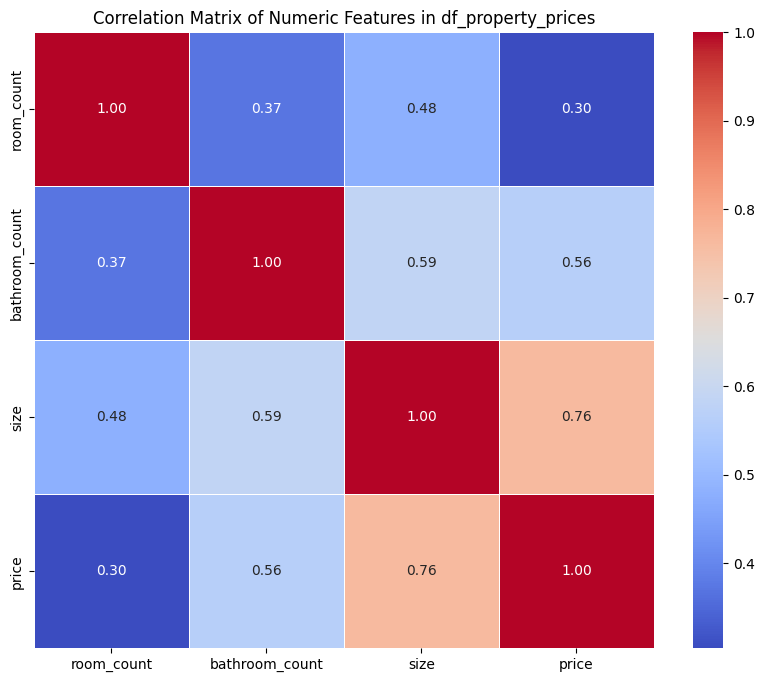

In [60]:

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numeric Features in df_property_prices')
plt.show()

In [61]:
# Save to CSV
df.to_csv('apartments_cleaned.csv', index=False)

## Documentation of Changes - Data Mining Project

### 1. **Initial Setup & Data Loading**
- Imported essential libraries: `pandas`, `matplotlib`, `seaborn`, and `numpy`
- Loaded the dataset: `Property Prices in Tunisia.csv`

### 2. **Data Filtering & Preprocessing** (Cell 4)
- **Geographic Filtering**: Limited data to Grand Tunis regions only (`Tunis`, `Ariana`, `Ben arous`, `La manouba`)
- **Property Type Filtering**:
  - Focused exclusively on `Appartements` category
  - Filtered for properties with `À Vendre` (For Sale) status
- **Price Transformation**: Converted prices from TND to kTND (thousands) by dividing by 1000
- **Column Cleanup**: Removed unnecessary columns: `category`, `type`, and `log_price`
- **Outlier Removal**: Applied multiple filters to remove unrealistic listings:
  - Properties priced above 3,000 kTND (3M TND)
  - Properties ≤70 kTND with size ≥70m² (underpriced large apartments)
  - Properties ≥1,000 kTND with size ≤90m² (overpriced small apartments)
  - Properties with ≥2 rooms but size ≤25m² (impossible configurations)

### 3. **Duplicate Detection & Removal**
- **Exact Duplicates**: Checked and removed completely identical rows
- **Partial Duplicates**: Identified duplicates based on key features (`room_count`, `bathroom_count`, `size`, `city`, `region`) excluding price variations

### 4. **Feature Engineering**
- **Created**: `price_per_sqm` feature (price per square meter in TND)
- **Filtered**: Removed properties with price/m² > 6,000 TND (outliers)
- **Dropped**: The temporary `price_per_sqm` column after analysis

### 5. **Exploratory Data Analysis (EDA)**

#### Statistical Analysis:
- Generated descriptive statistics for `size`, `bathroom_count`, and `price`
- Created price distribution analysis by room count

#### Visualizations Created:
- **Price per m² Distribution**: Histogram with KDE and median line
- **Size Distribution**: Histogram with KDE showing property size distribution
- **Room Count Distribution**: Count plot showing frequency of different room counts
- **Bathroom Count Distribution**: Count plot with descriptive statistics
- **City Distribution**: Bar chart showing property counts per city
- **Region Distribution**: Horizontal bar chart showing properties per region
- **Overall Price Distribution**: Box plot with log transformation
- **Price by Region**: Box plot comparing prices across regions (log-transformed)
- **Price by City**: Box plot comparing prices across cities (log-transformed)
- **Price by Bathroom Count**: Box plot showing price variation (log-transformed)
- **Price by Room Count**: Box plot showing price variation (log-transformed)
- **Price vs Size**: Regression plot showing relationship between size and log price
- **Correlation Matrix**: Heatmap showing correlations between numeric features

### 6. **Specific Insights Generated**
- Analyzed apartments below 80 kTND (80,000 TND)
- Analyzed luxury apartments above 1 MTND (1,000,000 TND)
- Calculated correlation matrix for all numeric features

### 7. **Final Output**
- Saved the cleaned dataset to `apartments_cleaned.csv`

### Key Transformations Summary:
- **Original scope** → **Filtered scope**: Grand Tunis apartments for sale only
- **Multiple outlier removal** strategies based on price, size, and room configurations
- **Price normalization**: Converted to kTND for easier analysis
- **Log transformations**: Applied to price visualizations to handle skewed distributions
- **Comprehensive quality control**: Removed exact and partial duplicates

The notebook demonstrates a thorough data cleaning and exploratory analysis workflow for Tunisian property prices, with particular focus on Grand Tunis apartment sales.